<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/b5xXg11/used-cars1.jpg width="1100" height="100">

[Image Credit](https://myscriptneedshelp.com/2022/auto/buying-used-cars-in-tempe-is-easier-now/)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. Nevertheless, we, the DA & DV instructors, recommend you study each part separately to create a source notebook for your further studies. 

# PART- 1 `( Data Cleaning )`

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
#pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [201]:
df = pd.read_json('scout_car.json', lines=True)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [203]:
df.head(3).T

,0,1,2
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,"56,013 km","80,000 km","83,450 km"
registration,01/2016,03/2017,02/2016
prev_owner,2 previous owners,None,1 previous owner
kW,NaN,NaN,NaN


In [204]:
df.describe()

,price,kW
count,15919.000,0.000
mean,18019.897,NaN
std,7386.169,NaN
min,13.000,NaN
25%,12850.000,NaN
50%,16900.000,NaN
75%,21900.000,NaN
max,74600.000,NaN


In [205]:
df.describe(include=[object]).T

,count,unique,top,freq
url,15919,15919,https://www.autoscout24.com//offers/audi-a1-sp...,1
make_model,15919,9,Audi A3,3097
short_description,15873,10001,SPB 1.6 TDI 116 CV S tronic Sport,64
body_type,15859,9,Sedans,7903
vat,11406,2,VAT deductible,10980
km,15919,6690,10 km,1045
registration,15919,48,-/-,1597
prev_owner,9091,4,1 previous owner,8294
hp,15919,81,85 kW,2542
Type,15917,169,"[, Used, , Diesel (Particulate Filter)]",3475


# Renaming The Columns 

In [206]:
pip install skimpy --user

Note: you may need to restart the kernel to use updated packages.


In [207]:
# # First Method

from skimpy import clean_columns

df = clean_columns(df)
df.head(3).T

42 column names have been cleaned

,0,1,2
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,"56,013 km","80,000 km","83,450 km"
registration,01/2016,03/2017,02/2016
prev_owner,2 previous owners,None,1 previous owner
k_w,NaN,NaN,NaN


#Second Method :
df.rename(columns={'\nComfort & Convenience\n': 'Comfort_Convenience', 
                   '\nEntertainment & Media\n': 'Entertainment_Media',
                   '\nExtras\n' : 'Extras', 
                   '\nSafety & Security\n':'Safety_Security'}, inplace=True)
                   
#Third Method :                   
for col in df.columns:
    df.rename(columns={col:col.lower().replace(" ","_")},inplace=True)

In [208]:
df.rename(columns={"co_2_emission" :"co2_emission",
                   "comfort_&_convenience" : "comfort_convenience",
                   "entertainment_&_media" : "entertainment_media",
                   "safety_&_security" : "safety_security"},inplace=True)

In [209]:
df.shape

(15919, 54)

# Percentage and Number of Null Values 

In [210]:
is_null = pd.DataFrame(df.isnull().sum(), columns = ['isnull'])
is_null

,isnull
url,0
make_model,0
short_description,46
body_type,60
price,0
vat,4513
km,0
registration,0
prev_owner,6828
k_w,15919


In [211]:
percentage_null = pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns = ['percentage_null'])
percentage_null

,percentage_null
url,0.000
make_model,0.000
short_description,0.289
body_type,0.377
price,0.000
vat,28.350
km,0.000
registration,0.000
prev_owner,42.892
k_w,100.000


In [212]:
summary_null = pd.concat([is_null, percentage_null], axis = 1).reset_index().rename({'index':'Columns'},axis = 1)
summary_null

,Columns,isnull,percentage_null
0,url,0,0.000
1,make_model,0,0.000
2,short_description,46,0.289
3,body_type,60,0.377
4,price,0,0.000
5,vat,4513,28.350
6,km,0,0.000
7,registration,0,0.000
8,prev_owner,6828,42.892
9,k_w,15919,100.000


# Droping columns that have missing values more than %80.

In [213]:
def df_nans(df, limit):
    missing = df.isnull().sum()*100 / df.shape[0]
    return missing.loc[lambda x : x >= limit]

def column_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

In [214]:
df_nans(df, 90)

k_w                             100.000
electricity_consumption          99.139
last_service_date                96.445
other_fuel_types                 94.472
availability                     96.011
last_timing_belt_service_date    99.899
available_from                   98.291
dtype: float64

In [215]:
df_nans(df, 80)

k_w                             100.000
electricity_consumption          99.139
last_service_date                96.445
other_fuel_types                 94.472
availability                     96.011
last_timing_belt_service_date    99.899
available_from                   98.291
dtype: float64

In [216]:
drop_columns = df_nans(df, 80).index
drop_columns

Index(['k_w', 'electricity_consumption', 'last_service_date',
       'other_fuel_types', 'availability', 'last_timing_belt_service_date',
       'available_from'],
      dtype='object')

In [217]:
df.drop(drop_columns, axis=1, inplace=True)

In [218]:
df.shape

(15919, 47)

In [219]:
df["null"].value_counts()

[]    15919
Name: null, dtype: int64

In [220]:
df.drop("null", axis=1, inplace=True)

## Let's examine and clean all the columns/features one by one

# url

In [221]:
df.url.value_counts(dropna=False)

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

In [222]:
# A data analyst should primarily benefit from all incoming data s/he encounters; HOWEVER,
# Even if url contains some information, we do NOT need it since this information can be obtained from other features.

df.drop("url", axis=1, inplace=True)

In [223]:
#Cleaning apply a function on some features in first_list.

def out_of_list(column_list, data):
    for item in column_list:
        data[item] = data[item].apply(lambda x: x[0] if type(x) == list else x)
        

In [224]:

first_list = ['make', 'upholstery', 'displacement', 'cylinders', 'drive_chain', 'gears',"previous_owners",'body_color_original',
                 "nr_of_doors","nr_of_seats","weight","co2_emission","emission_class"]


In [225]:
out_of_list(first_list, df)

In [226]:
#Then let's clean the '\n' parts.
for i in first_list:
    df[i] = df[i].str.replace("\n", "", regex = False)

In [227]:

second_list = ['model', 'body_color', 'gearing_type', 'fuel']


In [228]:

for item in second_list:
    df[item] = df[item].apply(lambda x: x[1] if type(x) == list else x)
    

In [229]:
df[['make_model', 'make', 'model']].sample(20)

,make_model,make,model
4422,Audi A3,Audi,A3
7993,Opel Astra,Opel,Astra
14249,Renault Clio,Renault,Clio
4103,Audi A3,Audi,A3
1062,Audi A1,Audi,A1
6999,Opel Astra,Opel,Astra
8854,Opel Corsa,Opel,Corsa
779,Audi A1,Audi,A1
10726,Opel Insignia,Opel,Insignia
6009,Opel Astra,Opel,Astra


In [230]:
df.drop(["make", "model"], axis=1, inplace=True)

# Description & Short Description

In [231]:
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
None                                              46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [232]:
df['short_description'].nunique()

10001

In [233]:
df.drop("short_description", axis=1, inplace=True)

In [234]:
df.shape

(15919, 42)

In [235]:
df['description'].astype('str').value_counts(dropna=False)

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [236]:
df['description'].astype('str').nunique()

12874

In [237]:
df.drop("description", axis=1, inplace=True)

In [238]:
df.shape

(15919, 41)

**Even if the columns of "short_description" & "description" contain detailed information, we do NOT need it since this information can be obtained from other features.**

# body & body_type

In [240]:
df[['body_type', 'body']].sample(20)

,body_type,body
7192,Station wagon,"[\n, Station wagon, \n]"
8817,Compact,"[\n, Compact, \n]"
7437,Station wagon,"[\n, Station wagon, \n]"
11912,Sedans,"[\n, Sedans, \n]"
7358,Sedans,"[\n, Sedans, \n]"
9704,Sedans,"[\n, Sedans, \n]"
95,Sedans,"[\n, Sedans, \n]"
548,Compact,"[\n, Compact, \n]"
11087,Station wagon,"[\n, Station wagon, \n]"
13405,Sedans,"[\n, Sedans, \n]"


In [241]:
df.drop("body", axis = 1, inplace = True)

**Both the columns of "body_type" & "body" have the same information, we will keep the "body_type" column which is more readable.**

## price (target column)

In [242]:
df.price.value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [243]:
df.price.isnull().sum()

0

In [244]:
df["price"].describe()

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

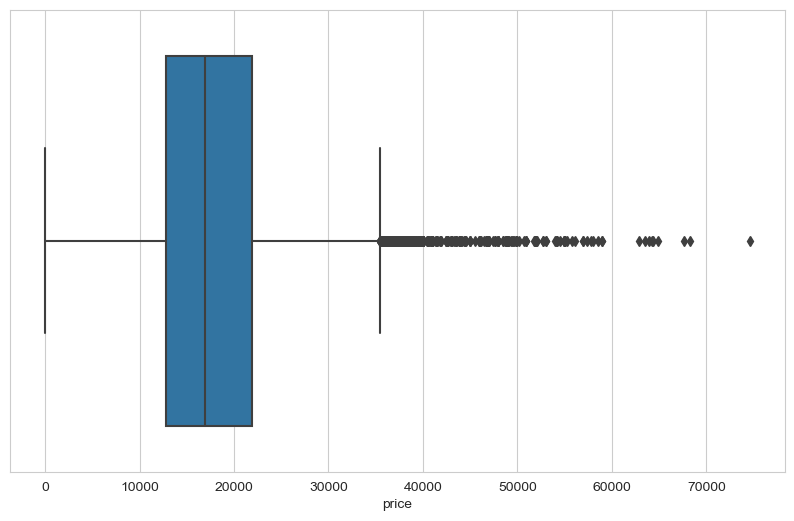

In [245]:
sns.boxplot(df.price);

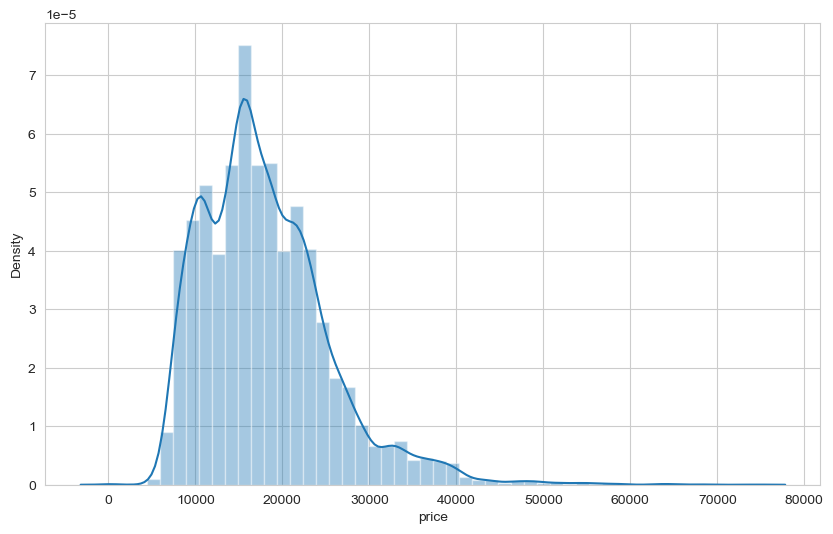

In [246]:
sns.distplot(df.price);

## vat
The **``"Value Added Tax"``** (VAT) in the European Union is a general, broadly based consumption tax assessed on the value added to goods and services.

In [247]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
None                 4513
Price negotiable      426
Name: vat, dtype: int64

# hp 

In [248]:
df.hp.value_counts()

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
65 kW        4
149 kW       3
80 kW        3
168 kW       3
98 kW        3
93 kW        3
228 kW       2
270 kW       2
53 kW        2
140 kW       2
86 kW        2
167 kW       2
127 kW       2
89 kW        2
143 kW       2
63 kW        2
40 kW     

In [249]:
df.hp = df.hp.str.replace('kW',' ')
df.hp

0         66  
1        141  
2         85  
3         66  
4         66  
         ...  
15914    147  
15915    165  
15916    146  
15917    147  
15918    165  
Name: hp, Length: 15919, dtype: object

In [250]:
# df['hp_kW'] = df['hp'].str.strip(' kW').replace('-', np.nan).astype(float)

In [251]:
#Alternative method

#df.replace({"hp" : {" kW" : ""}}, regex = True, inplace = True)
#df["hp_kw"] = pd.to_numeric(df.hp)

In [252]:
df.hp = df.hp.str.extract('(\d{1,4})').astype('float')

In [253]:
df.shape

(15919, 40)

# fuel

In [254]:
df.fuel

0                          Diesel (Particulate Filter)
1                                             Gasoline
2                          Diesel (Particulate Filter)
3                          Diesel (Particulate Filter)
4                          Diesel (Particulate Filter)
                             ...                      
15914                      Diesel (Particulate Filter)
15915    Super 95 / Super Plus 98 (Particulate Filter)
15916                                           Diesel
15917                                           Diesel
15918                                         Super 95
Name: fuel, Length: 15919, dtype: object

In [255]:
df["fuel"] = df.fuel.str.split("(").str[0].str.strip().str.split('/').str[0]

In [256]:
df.fuel

0           Diesel
1         Gasoline
2           Diesel
3           Diesel
4           Diesel
           ...    
15914       Diesel
15915    Super 95 
15916       Diesel
15917       Diesel
15918     Super 95
Name: fuel, Length: 15919, dtype: object

# km

In [239]:
df.km = df.km.str.replace('km',' ')
df.km

0        56,013  
1        80,000  
2        83,450  
3        73,000  
4        16,200  
           ...   
15914         -  
15915     9,900  
15916        15  
15917        10  
15918         -  
Name: km, Length: 15919, dtype: object

In [257]:
df.km.value_counts(dropna=False)

10          1045
-           1024
1            367
5            170
50           148
            ... 
67,469         1
43,197         1
10,027         1
35,882         1
57             1
Name: km, Length: 6690, dtype: int64

In [258]:
df["km"] = df.km.str.replace(',', '').str.extract('(\d{1,8})').astype('float') 
                                   # .str.extract('(\d+)')

In [259]:
# This is another solution

#df["km"] = df.km.str.replace(',', '').str.rstrip(" km").replace('-', np.nan).astype('float')

In [260]:
df.km.value_counts(dropna=False)

10.000       1045
NaN          1024
1.000         367
5.000         170
50.000        148
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6690, dtype: int64

# type 

In [261]:
df["type"] = [i[1] if i is not np.nan else np.nan for i in df.type ]
df["type"]

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: type, Length: 15919, dtype: object

In [262]:
df.type.value_counts(dropna= False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

## Next Inspection & Inspection new

In [263]:
df["inspection_new"]= [item[0] if type(item) == list else item for item in df["inspection_new"]]
df["inspection_new"]= df["inspection_new"].str.strip("\n")

In [264]:
df["inspection_new"].value_counts(dropna= False)

NaN    11987
Yes     3932
Name: inspection_new, dtype: int64

In [265]:
df.drop("next_inspection", axis = 1, inplace= True)

In [266]:
df.shape

(15919, 39)

# Warranty

In [267]:
df.warranty.astype('str').value_counts(dropna=False)

nan                                                                                                                5420
['\n', '\n', '\nEuro 6\n']                                                                                         1868
\n12 months\n                                                                                                      1177
\n                                                                                                                  979
\n24 months\n                                                                                                       566
                                                                                                                   ... 
['\n72 months\n', '\n125 g CO2/km (comb)\n']                                                                          1
['\n60 months\n', '\n14 g CO2/km (comb)\n']                                                                           1
['\n24 months\n', '\n121 g CO2/km (comb)

In [268]:
df["warranty"] = df.warranty.apply(lambda x : x[0] if type(x)==list else x)

In [269]:
df["warranty"] = df.warranty.str.strip("\n").str.extract('(\d{1,2})').astype("float") # str.extract('(\d+)')

In [270]:
df.warranty.value_counts(dropna=False)

NaN       11066
12.000     2594
24.000     1118
60.000      401
36.000      279
48.000      149
6.000       125
72.000       59
3.000        33
23.000       11
18.000       10
20.000        7
25.000        6
2.000         5
50.000        4
26.000        4
16.000        4
4.000         3
1.000         3
19.000        3
34.000        3
13.000        3
28.000        2
22.000        2
14.000        2
11.000        2
46.000        2
21.000        2
9.000         2
17.000        2
45.000        2
33.000        1
40.000        1
65.000        1
10.000        1
15.000        1
7.000         1
8.000         1
56.000        1
49.000        1
47.000        1
30.000        1
Name: warranty, dtype: int64

## Full Service

In [271]:
df['full_service'].astype('str').value_counts(dropna=False)

nan                                                                                                             7704
['\n', '\n', '\n4 (Green)\n']                                                                                   2235
['\n', '\n', '\nEuro 6\n']                                                                                      2097
['\n', '\n']                                                                                                    1702
['\n', '\n', '\nEuro 6d-TEMP\n']                                                                                 399
                                                                                                                ... 
['\n', '\n', '\n80 g CO2/km (comb)\n']                                                                             1
['\n', '\n', '\n84 g CO2/km (comb)\n']                                                                             1
['\n', '\n', '\n', '6 l/100 km (comb)', '\n', '8 l/100 km (city)

In [272]:
df.drop("full_service", axis=1, inplace=True)

In [273]:
df.shape

(15919, 38)

# Non-Smoking vehicle 

In [274]:
df['non_smoking_vehicle'].value_counts(dropna=False)

NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
[\n, \n, \n120 g CO2/km (comb)\n]                                                               63
[\n, \n, \n85 g CO2/km (comb)\n]                                                                46
[\n, \n, \n104 g CO2/km (comb)\n]                                                               36
[\n, \n, \n107 g CO2/km (comb)\n]                                                               36
[\n, \n, \

In [275]:
df.drop("non_smoking_vehicle", axis=1, inplace=True)

In [276]:
df.shape

(15919, 37)

# Registration & First Registration

In [277]:
df.registration.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [278]:
# df.registration.str.split('/').str[1]
# df.registration.str.extract("(\d{2}).(\d{4})")
# df.registration.str.extract("(\d{4})")

In [279]:
df["first_registration"].astype('str').value_counts(dropna=False)

['\n', '2018', '\n']    4522
['\n', '2016', '\n']    3674
['\n', '2017', '\n']    3273
['\n', '2019', '\n']    2853
nan                     1597
Name: first_registration, dtype: int64

**We prefer "First Registration" column because I don't need month values.**

In [280]:
#Other Solutions 
df.first_registration = [(re.sub(r'\n',' ',i[1])) if i is not np.nan else i for i in df.first_registration]


In [281]:
df['first_registration'] = df['first_registration'].astype('float')

In [282]:
df['first_registration'].value_counts(dropna=False)

2018.000    4522
2016.000    3674
2017.000    3273
2019.000    2853
NaN         1597
Name: first_registration, dtype: int64

In [283]:
df[['registration', 'first_registration']].sample(20)

,registration,first_registration
15194,01/2016,2016.000
11189,06/2016,2016.000
8506,09/2017,2017.000
2846,06/2016,2016.000
11850,10/2018,2018.000
160,02/2018,2018.000
9511,09/2018,2018.000
3617,02/2018,2018.000
6738,02/2017,2017.000
243,04/2016,2016.000


In [284]:
# The data used for this project were scraped in 2019.

df['age'] = 2019 - df['first_registration']

In [285]:
# The data used for this project were scraped in 2019.

df.age.value_counts(dropna=False)

1.000    4522
3.000    3674
2.000    3273
0.000    2853
NaN      1597
Name: age, dtype: int64

In [286]:
df.drop(["registration", "first_registration"], axis=1, inplace=True)

# previous_owner & prev_owner

In [287]:
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
None                 6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [288]:
df["previous_owners"].value_counts(dropna=False)

1      8294
NaN    6640
2       778
0       188
3        17
4         2
Name: previous_owners, dtype: int64

I prefer "previous_owners" column because it has less NaN values. But before dropping "prev_owner", I'll fill "Previous Owners" with "prev_owner".

In [289]:
df["previous_owners"] = df["previous_owners"].astype('float')

In [290]:
df[(df["previous_owners"].isna()) & (df["prev_owner"].notna())]#.value_counts()

,make_model,body_type,price,vat,km,prev_owner,hp,type,previous_owners,inspection_new,warranty,offer_number,body_color,paint_type,body_color_original,upholstery,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,country_version,age


In [291]:
df["previous_owners"].fillna(df["prev_owner"], inplace=True)

In [292]:
df["previous_owners"].value_counts(dropna=False)

1.000    8294
NaN      6640
2.000     778
0.000     188
3.000      17
4.000       2
Name: previous_owners, dtype: int64

In [293]:
df[(df["previous_owners"].isna()) & (df["prev_owner"].notna())]#.value_counts()

,make_model,body_type,price,vat,km,prev_owner,hp,type,previous_owners,inspection_new,warranty,offer_number,body_color,paint_type,body_color_original,upholstery,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,country_version,age


In [294]:
df.drop(columns= "prev_owner", inplace= True)

In [295]:
df.shape

(15919, 35)

# offer_number

In [296]:
df['offer_number'].astype('str').value_counts(dropna=False)

nan                                                 3175
['\nLT67679\n']                                       27
['\nUN89904\n']                                       27
['\nXJ38068\n']                                       27
['\nJV03654\n']                                       27
                                                    ... 
['\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n']       1
['\n6701576\n']                                        1
['\n6701569\n']                                        1
['\n158121\n']                                         1
['\nRe_30000008029\n']                                 1
Name: offer_number, Length: 11441, dtype: int64

In [297]:
df['offer_number'] = df['offer_number'].str[0].str.strip('\n')

In [298]:
df['offer_number'].value_counts()

LT67679                                     27
AK13780                                     27
TP62881                                     27
TA76392                                     27
XT61649                                     27
                                            ..
160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b     1
6701576                                      1
6701569                                      1
158121                                       1
Re_30000008029                               1
Name: offer_number, Length: 11440, dtype: int64

In [299]:
df.duplicated(subset='offer_number').sum()

4478

In [300]:
df.drop("offer_number", axis=1, inplace=True)

In [301]:
df.shape

(15919, 34)

## Body Color & Body Color Original

In [302]:
df.drop(["body_color", "body_color_original"], axis=1, inplace=True)

# Paint_type

In [303]:
df['paint_type'].astype('str').value_counts(dropna=False)

['\nMetallic\n']       9794
nan                    5772
['\nUni/basic\n']       347
['\nPerl effect\n']       6
Name: paint_type, dtype: int64

In [304]:
df['paint_type'] = df['paint_type'].str[0].str.strip('\n')

In [305]:
df['paint_type'].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

In [306]:
df.shape

(15919, 32)

# upholstery 

In [307]:
df["upholstery"] = [item[0] if type(item) == list else item for item in df.upholstery]

In [308]:
df["upholstery"].value_counts(dropna=False)

Cloth, Black           5821
NaN                    3720
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Full leather, Brown     116
Part leather, Grey      116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Velour, Black            36
Full leather, Beige      36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Brown                    12
Cloth, Blue              12
Velour, Grey              8
Cloth, White              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Part leather, Red         3
Beige               

In [309]:
df["upholstery"] = df.upholstery.str.strip("\n").str.split(", ")

In [310]:
df["upholstery"].astype('str').value_counts(dropna=False)

['Cloth', 'Black']           5821
nan                          3720
['Part leather', 'Black']    1121
['Cloth']                    1005
['Cloth', 'Grey']             891
['Cloth', 'Other']            639
['Full leather', 'Black']     575
['Black']                     491
['Grey']                      273
['Other', 'Other']            182
['Part leather']              140
['Full leather']              139
['Full leather', 'Brown']     116
['Part leather', 'Grey']      116
['Other', 'Black']            110
['Full leather', 'Other']      72
['Full leather', 'Grey']       67
['Part leather', 'Other']      65
['Other']                      56
['Part leather', 'Brown']      50
['alcantara', 'Black']         47
['Velour', 'Black']            36
['Full leather', 'Beige']      36
['Cloth', 'Brown']             28
['Velour']                     16
['Other', 'Grey']              15
['Cloth', 'Beige']             13
['Brown']                      12
['Cloth', 'Blue']              12
['Velour', 'Gr

In [311]:
u_type = ["Cloth", 'Part leather', 'Full leather', 'Velour', 'alcantara']

df["upholstery_type"] = df["upholstery"].apply(lambda x : x[0] if type(x) == list and x[0] in u_type else np.nan)

In [312]:
df["upholstery_type"].value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64

In [313]:
color = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def color_finder(x):
    if type(x) == list and len(x) == 2:
        return x[1]
    elif type(x) == list and x[0] in color:
        return x[0]
    else:
        return np.nan
    
df['upholstery_color'] = df.upholstery.apply(color_finder)

In [314]:
df["upholstery_color"].value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: upholstery_color, dtype: int64

In [315]:
df.drop("upholstery", axis=1, inplace=True)

In [316]:
df.shape

(15919, 33)

# nr__of_door & nr_of_seast

In [317]:
df["nr_of_doors"].astype('str').value_counts(dropna=False)

5      11575
4       3079
3        832
2        219
nan      212
1          1
7          1
Name: nr_of_doors, dtype: int64

In [318]:
df['Nr_of_Doors'] = df['nr_of_doors'].str[0].str.strip('\n').astype('float')

In [319]:
df["Nr_of_Doors"].value_counts(dropna=False)

5.000    11575
4.000     3079
3.000      832
2.000      219
NaN        212
1.000        1
7.000        1
Name: Nr_of_Doors, dtype: int64

In [320]:
df.drop("nr_of_doors", axis=1, inplace=True)

In [321]:
df.shape

(15919, 33)

In [322]:
df["nr_of_seats"].astype('str').value_counts(dropna=False)

5      13336
4       1125
nan      977
7        362
2        116
6          2
3          1
Name: nr_of_seats, dtype: int64

In [323]:
df['Nr_of_Seats'] = df['nr_of_seats'].str[0].str.strip('\n').astype('float')

In [324]:
df["Nr_of_Seats"].value_counts(dropna=False)

5.000    13336
4.000     1125
NaN        977
7.000      362
2.000      116
6.000        2
3.000        1
Name: Nr_of_Seats, dtype: int64

In [325]:
df.drop("nr_of_seats", axis=1, inplace=True)

In [326]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'hp', 'type',
       'previous_owners', 'inspection_new', 'warranty', 'paint_type',
       'model_code', 'gearing_type', 'displacement', 'cylinders', 'weight',
       'drive_chain', 'fuel', 'consumption', 'co2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'emission_label', 'gears', 'country_version', 'age',
       'upholstery_type', 'upholstery_color', 'Nr_of_Doors', 'Nr_of_Seats'],
      dtype='object')

# Model_Code

In [327]:
df["model_code"].astype('str').value_counts(dropna=False)

nan                 10941
['\n0035/BCB\n']      268
['\n0588/BNO\n']      245
['\n0588/BDB\n']      206
['\n0588/BHX\n']      188
                    ...  
['\n0035/AVN\n']        1
['\n0035/BEM\n']        1
['\n0035/BAG\n']        1
['\n0035/BAA\n']        1
['\n3333/BKG\n']        1
Name: model_code, Length: 233, dtype: int64

In [328]:
df.drop("model_code", axis=1, inplace=True)

In [329]:
df.gearing_type.value_counts(dropna= False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

# displacement 

In [330]:
df.displacement = df.displacement.str.replace('cc',' ')
df.displacement 

0        1,422  
1        1,798  
2        1,598  
3        1,422  
4        1,422  
          ...   
15914    1,997  
15915    1,798  
15916    1,997  
15917    1,997  
15918    1,798  
Name: displacement, Length: 15919, dtype: object

In [331]:
df.displacement.str.strip('\n').str.replace(',', '').astype('float')

0       1422.000
1       1798.000
2       1598.000
3       1422.000
4       1422.000
          ...   
15914   1997.000
15915   1798.000
15916   1997.000
15917   1997.000
15918   1798.000
Name: displacement, Length: 15919, dtype: float64

# weight 

In [332]:
df.weight = df.weight.str.replace('kg',' ')
df.weight

0        1,220  
1        1,255  
2            NaN
3        1,195  
4            NaN
          ...   
15914    1,758  
15915    1,708  
15916        NaN
15917    1,758  
15918    1,685  
Name: weight, Length: 15919, dtype: object

In [333]:
df.weight.str.strip('\n').str.replace(',', '').astype('float')

0       1220.000
1       1255.000
2            NaN
3       1195.000
4            NaN
          ...   
15914   1758.000
15915   1708.000
15916        NaN
15917   1758.000
15918   1685.000
Name: weight, Length: 15919, dtype: float64

In [334]:
df.weight.value_counts(dropna= False)

NaN        6974
1,163       574
1,360       356
1,165       301
1,335       242
           ... 
1,960         1
1,258         1
1,167         1
1,331         1
2,037         1
Name: weight, Length: 435, dtype: int64

# Cylinders

In [335]:
df["cylinders"] = df.cylinders.str[0].str.strip('\n').astype("float")

In [336]:
df["cylinders"].value_counts(dropna=False)

4.000    8105
NaN      5680
3.000    2104
5.000      22
6.000       3
8.000       2
2.000       2
1.000       1
Name: cylinders, dtype: int64

# consumption 

In [337]:
df["consumption"].astype('str').value_counts(dropna=False)

nan                                                                                                 1906
[['3.9 l/100 km (comb)'], ['4.1 l/100 km (city)'], ['3.7 l/100 km (country)']]                       304
[['4.2 l/100 km (comb)'], ['5 l/100 km (city)'], ['3.7 l/100 km (country)']]                         276
[['5.4 l/100 km (comb)'], ['6.8 l/100 km (city)'], ['4.5 l/100 km (country)']]                       257
[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]                       253
                                                                                                    ... 
[['4.2 l/100 km (comb)'], ['5.3 l/100 km (city)'], ['3.6 l/100 km (country)']]                         1
['\n', '5.1 l/100 km (comb)', '\n', '6.4 l/100 km (city)', '\n', '4.3 l/100 km (country)', '\n']       1
[['4.6 l/100 km (comb)'], ['5.4 l/100 km (city)'], ['6.7 l/100 km (country)']]                         1
['\n', '6.3 l/100 km (comb)', '\n', '\n', '\n']        

In [338]:
def cons_comb(x):
    
    if type(x)==list and len(x)==3:
        if x[0] != []: return x[0][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return x[1]
    
    if type(x)==list and len(x)==7:
        return x[1]
    
    else:
        return None

In [339]:
df['cons_comb'] = df.consumption.apply(cons_comb).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float") # str.extract('(\S+)')

In [340]:
df["cons_comb"].value_counts(dropna=False).head()

NaN      2033
5.400     770
3.900     733
4.000     713
5.100     657
Name: cons_comb, dtype: int64

In [341]:
def cons_city(x):
    
    if type(x)==list and len(x)==3:
        if x[1] != []: return x[1][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[3]
    
    else:
        return None

In [342]:
df['cons_city'] = df.consumption.apply(cons_city).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")

In [343]:
def cons_country(x):
    
    if type(x)==list and len(x)==3:
        if x[2] != []: return x[2][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[5]
    
    else:
        return None

In [344]:
df['cons_country'] = df.consumption.apply(cons_country).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")

In [345]:
df.drop('consumption', axis=1,inplace=True)

# Co2 Emission

In [346]:
df["co2_emission"].astype('str').value_counts(dropna=False)

nan                      2436
120 g CO2/km (comb)       740
99 g CO2/km (comb)        545
97 g CO2/km (comb)        537
104 g CO2/km (comb)       501
                         ... 
14 g CO2/km (comb)          1
1,060 g CO2/km (comb)       1
51 g CO2/km (comb)          1
165 g CO2/km (comb)         1
193 g CO2/km (comb)         1
Name: co2_emission, Length: 123, dtype: int64

In [347]:
df["co2_emission"] = df['co2_emission'].str[0].str.strip().str.replace(',', '').str.extract('(\d+)').astype('float')

In [348]:
df["co2_emission"].value_counts(dropna=False)

1.000    11343
NaN       2436
9.000     1784
8.000      343
3.000        4
5.000        4
0.000        2
2.000        2
4.000        1
Name: co2_emission, dtype: int64

In [349]:
df.shape

(15919, 34)

# Emisson_Class

In [350]:
df["emission_class"].astype('str').value_counts(dropna=False)

Euro 6          10139
nan              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [351]:

df.replace({"emission_class" : {"Euro 6d-TEMP": "Euro 6", "Euro 6c": "Euro 6", "Euro 6d": "Euro 6"}}, regex=True, inplace=True)


In [352]:
df["emission_class"].astype('str').value_counts(dropna=False)

Euro 6    12173
nan        3628
Euro 5       78
Euro 4       40
Name: emission_class, dtype: int64

# emission_label

In [353]:
df.emission_label.astype('str').value_counts(dropna=False)

nan                       11934
['\n4 (Green)\n']          3553
['\n1 (No sticker)\n']      381
[[], [], []]                 40
['\n5 (Blue)\n']              8
['\n3 (Yellow)\n']            2
['\n2 (Red)\n']               1
Name: emission_label, dtype: int64

In [354]:
df.drop("emission_label", axis = 1, inplace = True)

# Gears

In [355]:
df.gears.value_counts(dropna = False )

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: gears, dtype: int64

# comfort_convenience 

In [356]:
df["comfort_convenience"] = [", ".join(item) if type(item) == list else item for item in df.comfort_convenience]
df["comfort_convenience"]

0        Air conditioning, Armrest, Automatic climate c...
1        Air conditioning, Automatic climate control, H...
2        Air conditioning, Cruise control, Electrical s...
3        Air suspension, Armrest, Auxiliary heating, El...
4        Air conditioning, Armrest, Automatic climate c...
                               ...                        
15914    Air conditioning, Automatic climate control, C...
15915    Air conditioning, Automatic climate control, C...
15916    Air conditioning, Armrest, Automatic climate c...
15917    Air conditioning, Automatic climate control, C...
15918    Air conditioning, Automatic climate control, C...
Name: comfort_convenience, Length: 15919, dtype: object

# entertainment_media

In [357]:
df["entertainment_media"]

0        [Bluetooth, Hands-free equipment, On-board com...
1        [Bluetooth, Hands-free equipment, On-board com...
2                                 [MP3, On-board computer]
3        [Bluetooth, CD player, Hands-free equipment, M...
4        [Bluetooth, CD player, Hands-free equipment, M...
                               ...                        
15914    [Bluetooth, Digital radio, Hands-free equipmen...
15915    [Bluetooth, Digital radio, Hands-free equipmen...
15916    [Bluetooth, Hands-free equipment, On-board com...
15917               [Bluetooth, Digital radio, Radio, USB]
15918                                                [USB]
Name: entertainment_media, Length: 15919, dtype: object

In [358]:
df["entertainment_media"]=[", ".join(item) if type(item) == list else item for item in df.entertainment_media]
df["entertainment_media"]

0        Bluetooth, Hands-free equipment, On-board comp...
1        Bluetooth, Hands-free equipment, On-board comp...
2                                   MP3, On-board computer
3        Bluetooth, CD player, Hands-free equipment, MP...
4        Bluetooth, CD player, Hands-free equipment, MP...
                               ...                        
15914    Bluetooth, Digital radio, Hands-free equipment...
15915    Bluetooth, Digital radio, Hands-free equipment...
15916    Bluetooth, Hands-free equipment, On-board comp...
15917                 Bluetooth, Digital radio, Radio, USB
15918                                                  USB
Name: entertainment_media, Length: 15919, dtype: object

# extras 

In [359]:
df["extras"]

0        [Alloy wheels, Catalytic Converter, Voice Cont...
1        [Alloy wheels, Sport seats, Sport suspension, ...
2                            [Alloy wheels, Voice Control]
3               [Alloy wheels, Sport seats, Voice Control]
4        [Alloy wheels, Sport package, Sport suspension...
                               ...                        
15914                         [Alloy wheels, Touch screen]
15915          [Alloy wheels, Touch screen, Voice Control]
15916                                       [Alloy wheels]
15917                         [Alloy wheels, Touch screen]
15918                         [Alloy wheels, Touch screen]
Name: extras, Length: 15919, dtype: object

In [360]:
df["extras"] = [", ".join(item) if type(item) == list else item for item in df.extras]
df["extras"]

0         Alloy wheels, Catalytic Converter, Voice Control
1        Alloy wheels, Sport seats, Sport suspension, V...
2                              Alloy wheels, Voice Control
3                 Alloy wheels, Sport seats, Voice Control
4        Alloy wheels, Sport package, Sport suspension,...
                               ...                        
15914                           Alloy wheels, Touch screen
15915            Alloy wheels, Touch screen, Voice Control
15916                                         Alloy wheels
15917                           Alloy wheels, Touch screen
15918                           Alloy wheels, Touch screen
Name: extras, Length: 15919, dtype: object

# safety_security

In [361]:
df["safety_security"]

0        [ABS, Central door lock, Daytime running light...
1        [ABS, Central door lock, Central door lock wit...
2        [ABS, Central door lock, Daytime running light...
3        [ABS, Alarm system, Central door lock with rem...
4        [ABS, Central door lock, Driver-side airbag, E...
                               ...                        
15914    [ABS, Central door lock, Central door lock wit...
15915    [ABS, Adaptive Cruise Control, Blind spot moni...
15916    [ABS, Adaptive Cruise Control, Blind spot moni...
15917    [ABS, Blind spot monitor, Driver-side airbag, ...
15918    [ABS, Blind spot monitor, Daytime running ligh...
Name: safety_security, Length: 15919, dtype: object

In [362]:
df["safety_security"] = [", ".join(item) if type(item) == list else item for item in df.safety_security]
df["safety_security"]

0        ABS, Central door lock, Daytime running lights...
1        ABS, Central door lock, Central door lock with...
2        ABS, Central door lock, Daytime running lights...
3        ABS, Alarm system, Central door lock with remo...
4        ABS, Central door lock, Driver-side airbag, El...
                               ...                        
15914    ABS, Central door lock, Central door lock with...
15915    ABS, Adaptive Cruise Control, Blind spot monit...
15916    ABS, Adaptive Cruise Control, Blind spot monit...
15917    ABS, Blind spot monitor, Driver-side airbag, E...
15918    ABS, Blind spot monitor, Daytime running light...
Name: safety_security, Length: 15919, dtype: object

# country_version

In [363]:
df.country_version

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4        [\nGermany\n]
             ...      
15914              NaN
15915    [\nGermany\n]
15916    [\nAustria\n]
15917              NaN
15918    [\nGermany\n]
Name: country_version, Length: 15919, dtype: object

In [364]:
df.country_version = [ (re.sub(r'\n','',str(i[0]))) if i is not np.nan else np.nan for i in df.country_version ]
df.country_version

0            NaN
1            NaN
2            NaN
3            NaN
4        Germany
          ...   
15914        NaN
15915    Germany
15916    Austria
15917        NaN
15918    Germany
Name: country_version, Length: 15919, dtype: object

In [365]:
df.country_version.value_counts(dropna = False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country_version, dtype: int64

In [366]:
df.drop("country_version", axis = 1 , inplace = True )

In [367]:
df.shape

(15919, 32)

In [368]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
hp,66.000,141.000,85.000
type,Used,Used,Used
previous_owners,2.000,NaN,1.000
inspection_new,Yes,NaN,NaN
warranty,NaN,NaN,NaN


In [370]:
df.to_csv("DAwPY_Capstone_Project_Data_Cleaning(Auto_Scout24).csv", index=False)